<a href="https://colab.research.google.com/github/CallineKelly/Data-visualization/blob/main/visualization_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_file/netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers"
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies"
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV"


data preprocessing

In [6]:
# check missing value
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
dtype: int64


In [8]:
# fill missing country with 'unknown'
df['country']=df['country'].fillna('unknown')

# split genres into list
df['genres_list']=df['genres'].apply(lambda x: [i.strip() for i in x.split(',')])

task 1

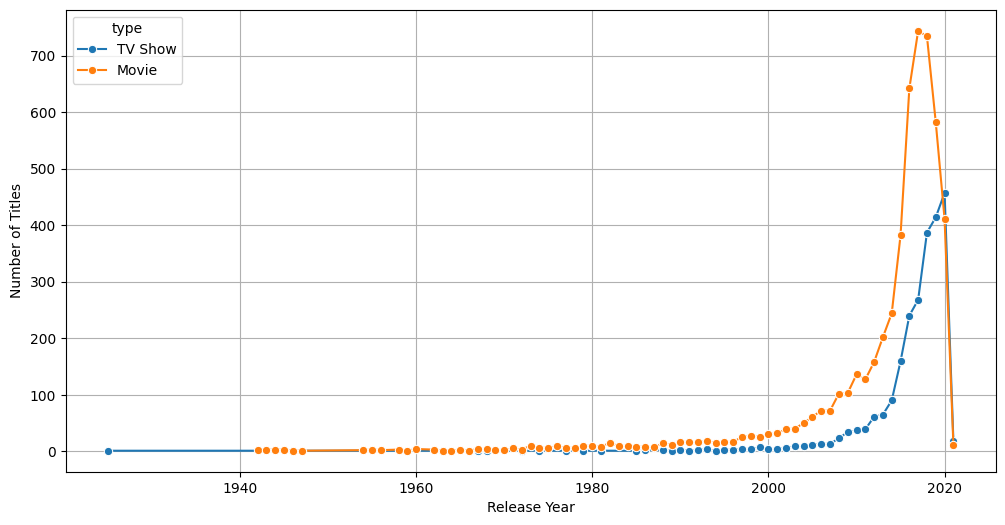

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df.groupby(['release_year','type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=type_counts,x='release_year', y='count', hue='type', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

Task 2

<ipython-input-11-6bf4e6d227a5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="magma")


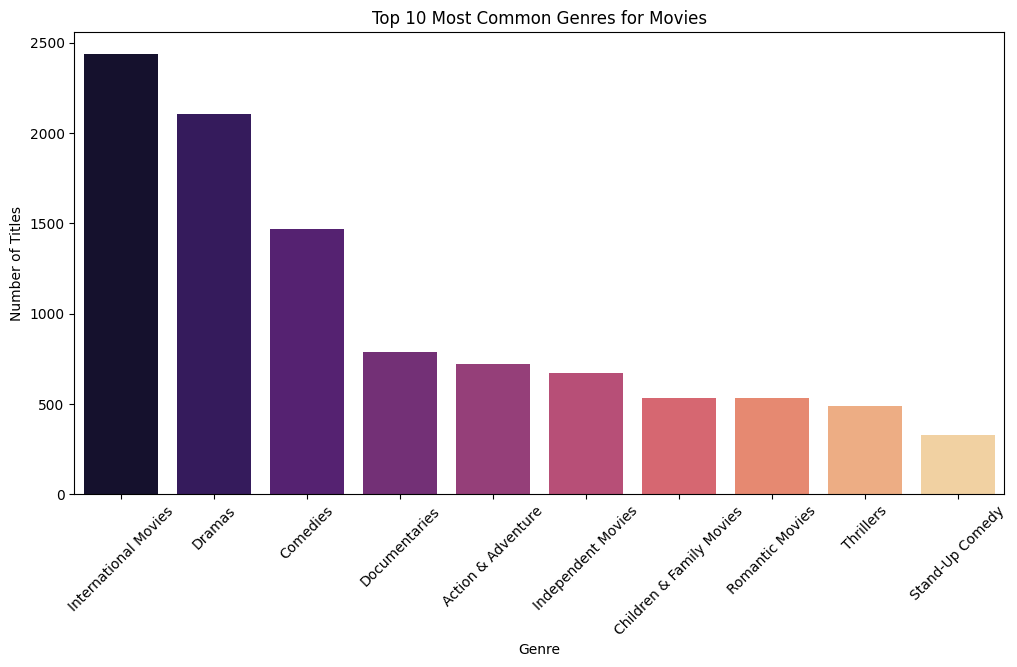

In [11]:
# Filter only Movies
movies_df = df[df['type'] == 'Movie']

# Explode genres into separate rows
movies_genres = movies_df.explode('genres_list')

# Count genres
genre_counts = movies_genres['genres_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="magma")
plt.title('Top 10 Most Common Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


task 3

<ipython-input-12-effd1bee70d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")


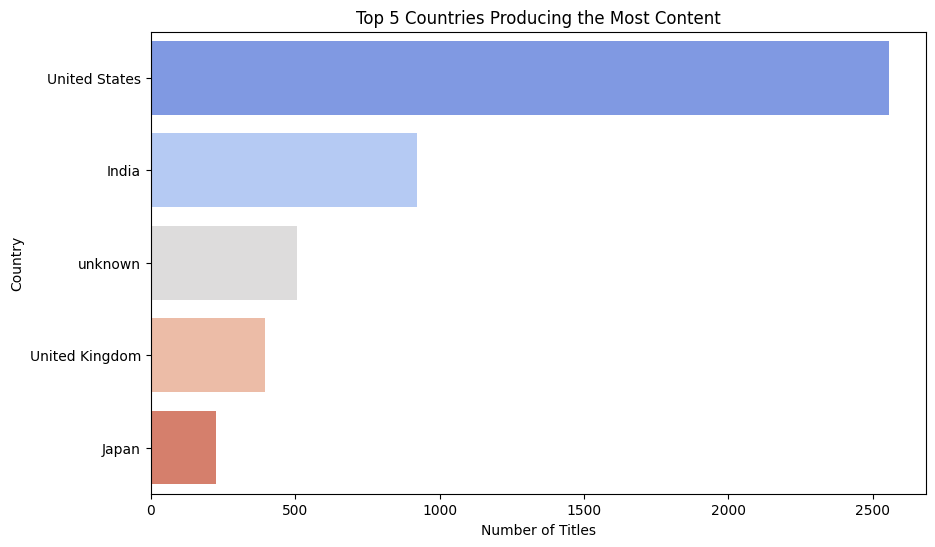

In [12]:
# Count titles by country
country_counts = df['country'].value_counts().head(5)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")
plt.title('Top 5 Countries Producing the Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
